Pokémon is a group of adorable creatures peacefully colonizing a planet until humans come along and make them combat each other in order to get shiny badges and we can call them Pokémon masters.
In this universe, there exists a group of rare and often strong Pokémon, known as Legendary Pokémon. Unfortunately, there are no detailed criteria that define these Pokémon.
The only way to recognize a Legendary Pokémon is through information from official media, such as the game or anime.
This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. The legend of a pokemon cannot be suspected only by its Attack and Defense. It would be worth finding which variables can define the legend of a pokemon. The strategy is to analyze the data and perform a predictive task of classification to predict the legend of a pokemon using a decision tree algorithm.

Data Description:

Column Names	Description
ID	             ID of each Pokemon
Name	         Name of each Pokemon
Type 1	         Each Pokemon has a type, this determines weakness/resistance to attacks
Type 2	         Some Pokemon are dual type and have 2
Total	         sum of all stats that come after this, a general guide to how strong a Pokemon is
HP	             hit points, or health, defines how much damage a Pokemon can withstand before fainting
Attack	         the base modifier for normal attacks (eg. Scratch, Punch)
Defense	         the base damage resistance against normal attacks
SP Atk	         special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
SP Def	         the base damage resistance against special attacks
Speed	         determines which Pokemon attacks first each round
Generation	     type of generation of the Pokemon
Legendary	     Rare Pokemon

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [12]:
#Loading dataset
df=pd.read_csv("Pokemon.csv")

In [13]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


In [25]:
df.nunique()

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [26]:
def histogram_boxplot(feature, figsize=(10,7), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet', orient= 'h') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

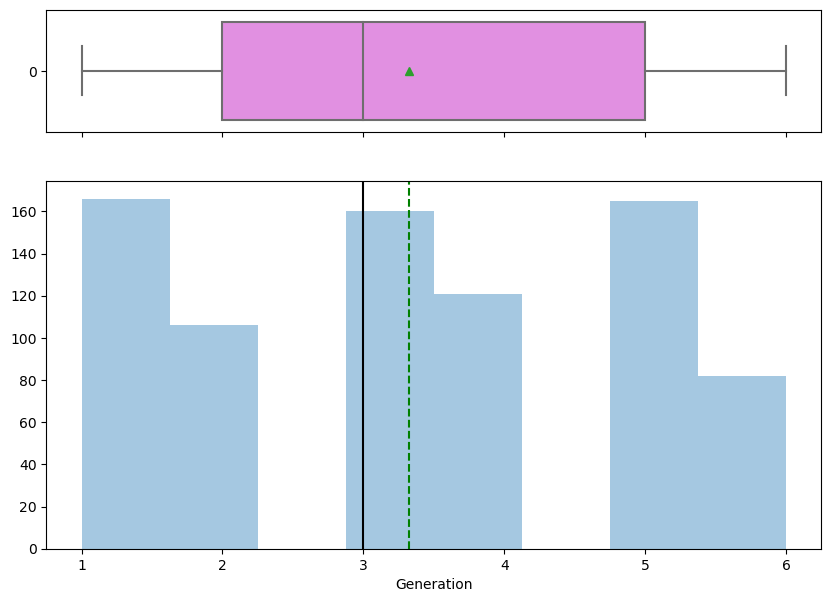

In [28]:
histogram_boxplot(data['Generation'])

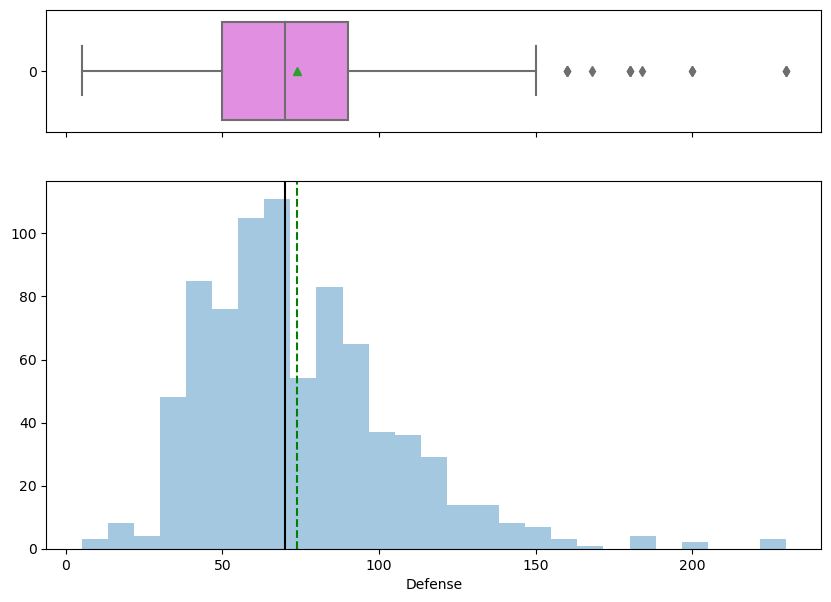

In [30]:
histogram_boxplot(data['Defense'])

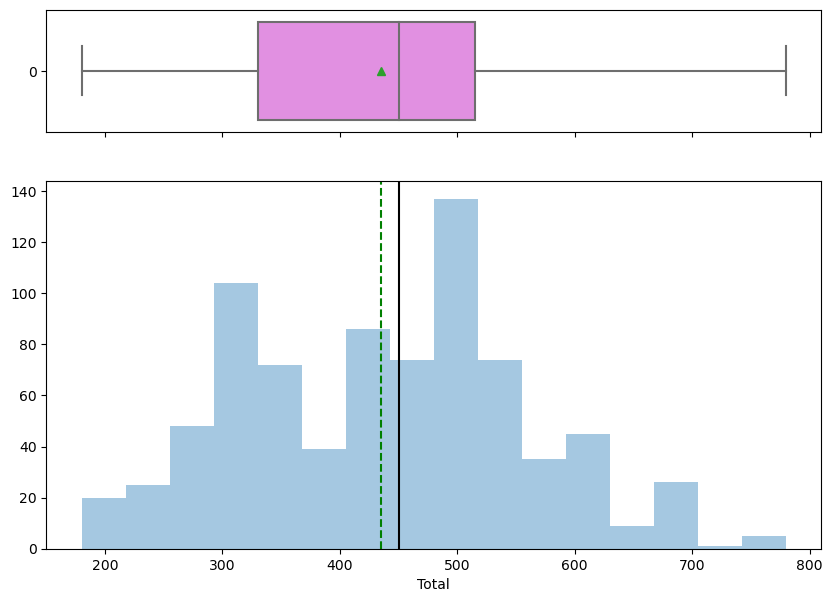

In [33]:
histogram_boxplot(data['Total'])

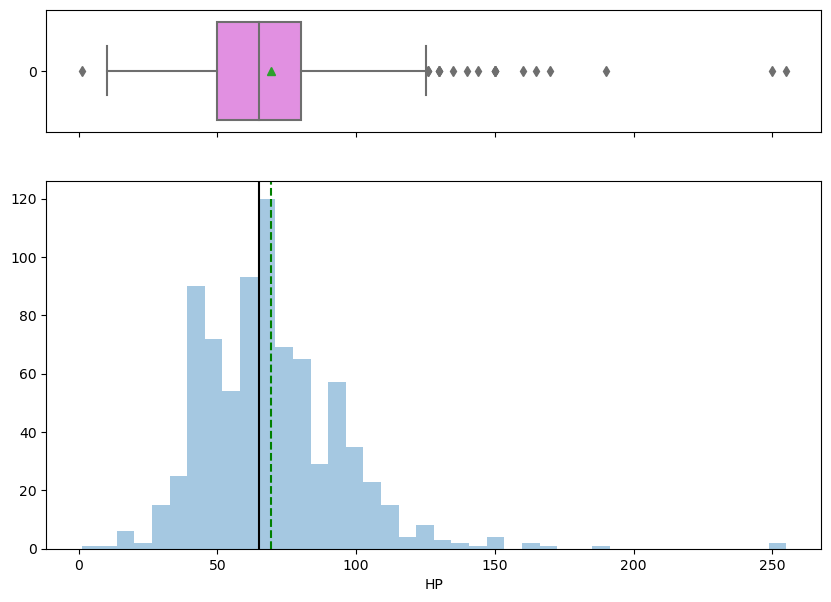

In [34]:
histogram_boxplot(data['HP'])

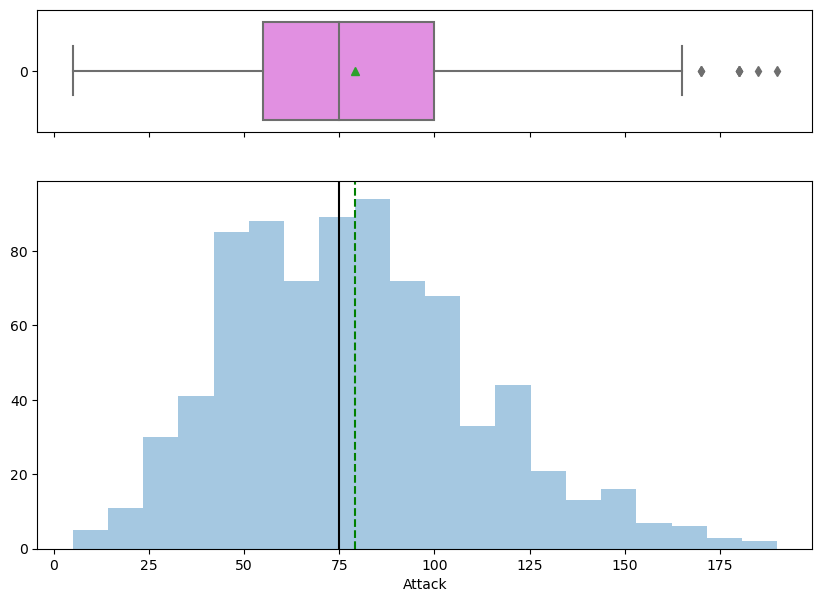

In [35]:
histogram_boxplot(data['Attack'])

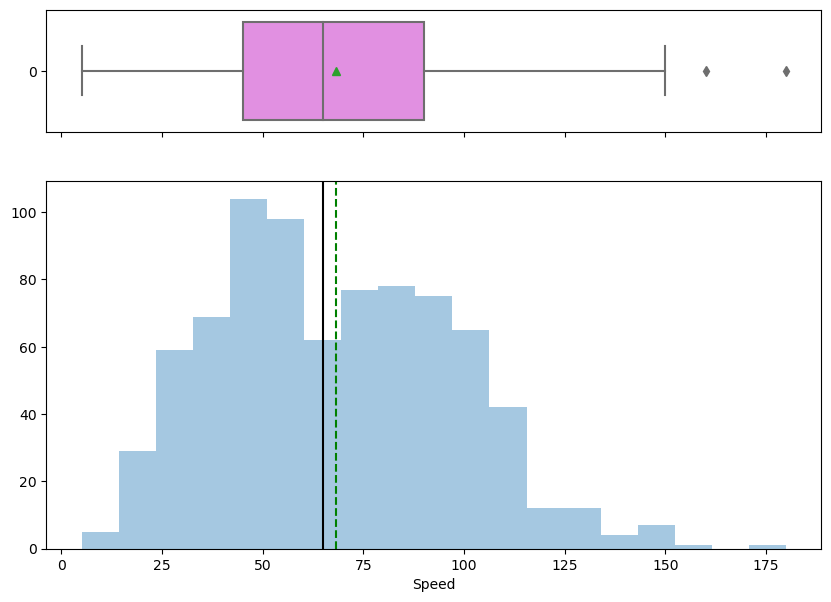

In [36]:
histogram_boxplot(data['Speed'])

In [40]:
#Top 5 highest values
data['cnt'].nlargest()

KeyError: 'cnt'